In [1]:
import pandas as pd
import pandas as xlsx
import matplotlib as mat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

In [2]:
data=pd.read_csv('list_attr_celeba.csv')
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
data1=pd.read_csv('list_eval_partition.csv')
data1.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


# checking null values

In [4]:
missing= np.where(data.isnull()==True)
missing

(array([], dtype=int64), array([], dtype=int64))

# dropping some columns

In [5]:
to_drop=['Attractive','Bald','Bangs','Bags_Under_Eyes']
data.drop(to_drop, inplace=True, axis=1)

In [6]:
data['Big_Lips'].unique()

array([-1,  1], dtype=int64)

# carrying out a correlation matrix

In [7]:
linda=data.corr()
linda

,5_o_Clock_Shadow,Arched_Eyebrows,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5_o_Clock_Shadow,1.000000,-0.158587,-0.043699,0.152010,1.006038e-01,-0.132686,-0.033370,-0.012294,0.217964,-0.010260,...,0.259370,-0.067777,0.052260,-0.124250,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.000000,0.243400,-0.084025,-9.959764e-04,0.127009,-0.075948,0.017850,-0.018046,-0.089423,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.099980,0.460409,0.220184,-0.132821,0.146798
Big_Lips,-0.043699,0.243400,1.000000,0.076814,6.719131e-02,0.023674,-0.037086,-0.015361,0.020804,0.007811,...,-0.039739,0.012885,-0.037144,0.120190,0.126523,-0.013286,0.195212,0.149892,-0.067770,0.107722
Big_Nose,0.152010,-0.084025,0.076814,1.000000,8.109064e-02,-0.158323,-0.037710,-0.133210,0.141162,0.314317,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.035930,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.067191,0.081091,1.000000e+00,-0.233626,-0.037961,-0.252398,0.257974,0.009766,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372
Blond_Hair,-0.132686,0.127009,0.023674,-0.158323,-2.336262e-01,1.000000,-0.010504,-0.169770,-0.150123,-0.089816,...,-0.096039,0.090209,0.005458,0.128400,0.095005,-0.083373,0.281935,0.143577,-0.106377,0.052402
Blurry,-0.033370,-0.075948,-0.037086,-0.037710,-3.796077e-02,-0.010504,1.000000,-0.039646,-0.065466,-0.009027,...,-0.024678,-0.053492,-0.036715,-0.019523,-0.057897,0.016343,-0.127380,-0.004379,-0.014948,-0.066302
Brown_Hair,-0.012294,0.017850,-0.015361,-0.133210,-2.523977e-01,-0.169770,-0.039646,1.000000,-0.064194,-0.093254,...,-0.034737,0.023407,-0.016089,0.153802,0.001374,-0.098443,0.100642,-0.004242,-0.072717,0.102751
Bushy_Eyebrows,0.217964,-0.018046,0.020804,0.141162,2.579739e-01,-0.150123,-0.065466,-0.064194,1.000000,-0.003829,...,0.128440,-0.002924,0.074030,-0.061635,-0.076207,-0.019799,-0.171721,-0.071135,0.063552,0.085194
Chubby,-0.010260,-0.089423,0.007811,0.314317,9.766143e-03,-0.089816,-0.009027,-0.093254,-0.003829,1.000000,...,0.115719,0.036026,-0.033161,-0.097074,-0.055836,0.058994,-0.193514,-0.048794,0.195690,-0.294741


# data visualization using heat map

<AxesSubplot:>

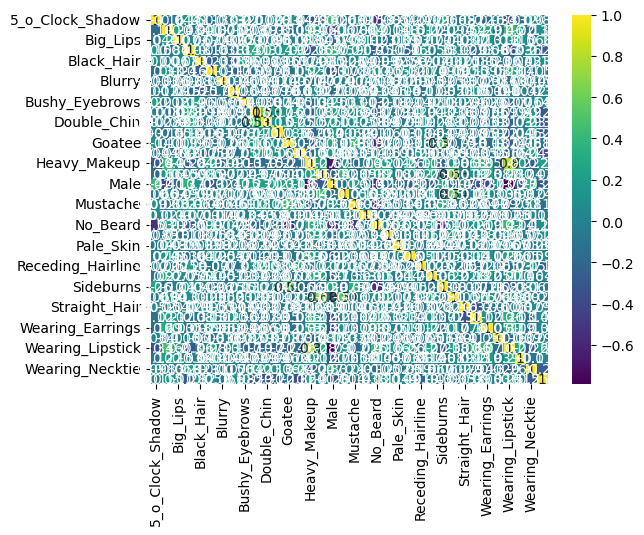

In [8]:
sns.heatmap(linda, annot=True,cmap='viridis')


# feature independent plots for first csv file

array([[<AxesSubplot:title={'center':'5_o_Clock_Shadow'}>,
        <AxesSubplot:title={'center':'Arched_Eyebrows'}>,
        <AxesSubplot:title={'center':'Big_Lips'}>,
        <AxesSubplot:title={'center':'Big_Nose'}>,
        <AxesSubplot:title={'center':'Black_Hair'}>,
        <AxesSubplot:title={'center':'Blond_Hair'}>],
       [<AxesSubplot:title={'center':'Blurry'}>,
        <AxesSubplot:title={'center':'Brown_Hair'}>,
        <AxesSubplot:title={'center':'Bushy_Eyebrows'}>,
        <AxesSubplot:title={'center':'Chubby'}>,
        <AxesSubplot:title={'center':'Double_Chin'}>,
        <AxesSubplot:title={'center':'Eyeglasses'}>],
       [<AxesSubplot:title={'center':'Goatee'}>,
        <AxesSubplot:title={'center':'Gray_Hair'}>,
        <AxesSubplot:title={'center':'Heavy_Makeup'}>,
        <AxesSubplot:title={'center':'High_Cheekbones'}>,
        <AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Mouth_Slightly_Open'}>],
       [<AxesSubplot:title={'cente

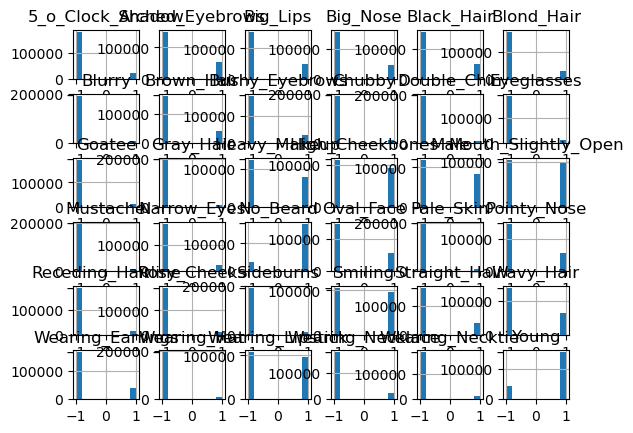

In [9]:
data.hist()

# feature independent plots

array([[<AxesSubplot:title={'center':'partition'}>]], dtype=object)

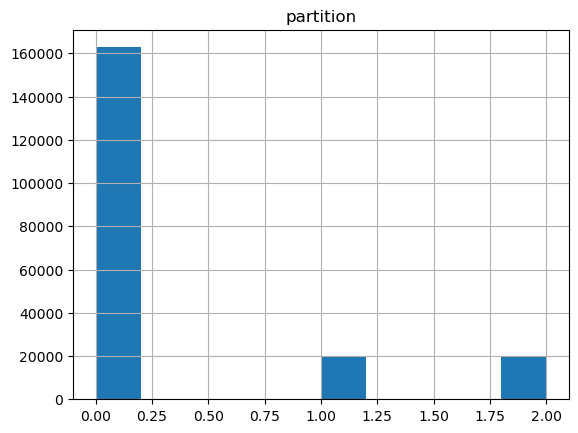

In [10]:
data1.hist()

# data visualization using boxplot

<AxesSubplot:>

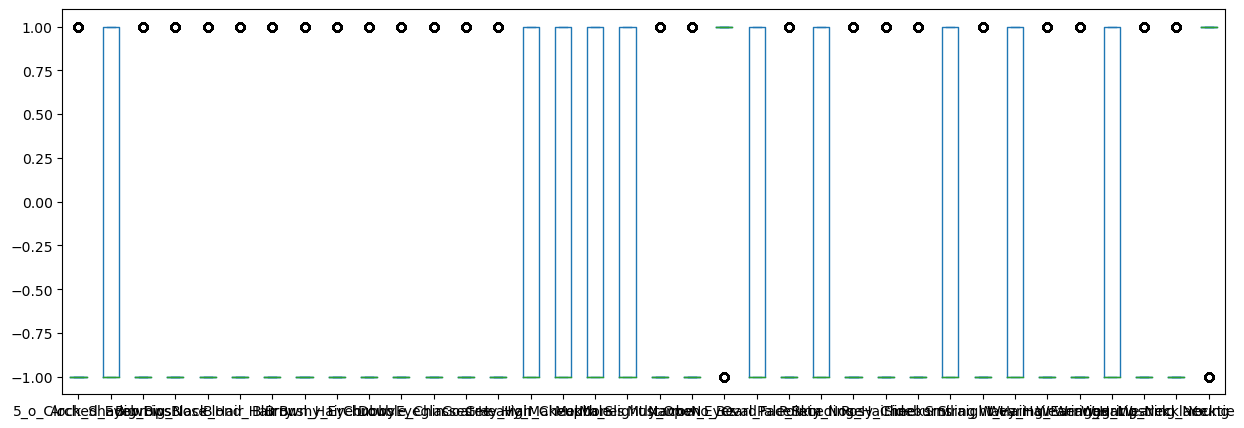

In [11]:
data.plot(kind='box',figsize=(15,5))


# pattern illustration of this project 

creating haarcasade

# splitting data


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
import numpy as np
x=data.iloc[:,:8].values
y=data.iloc[:,8].values.reshape(-1,1)
print(np.shape(x))
print(np.shape(y))

(202599, 8)
(202599, 1)


In [14]:
X_train, X_test,y_train, y_test = train_test_split(x,y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [15]:
X_train.shape

(151949, 8)

In [16]:
X_test.shape

(50650, 8)

validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,xval,y_train,yval =train_test_split(X_train,y_train,test_size =0.2)

In [19]:
X_train.size

972472

In [20]:
len(X_train)

121559

# model fitting

# return parameters of the dataset

In [27]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ModuleNotFoundError: No module named 'tensorflow'

In [28]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

NameError: name 'datasets' is not defined

# returning parameters

In [30]:
model.get_params()

NameError: name 'model' is not defined